# **Introduction**


Vision Zero is a strategy to eliminate all traffic fatalities and severe injuries, while increasing safe, healthy, equitable mobility for all. First implemented in Sweden in the 1990s, Vision Zero has proved successful across Europe — and now it's gaining momentum in major American cities.

Vision Zeros impact on accidents and fatalities. 

Date range:  2012-07-01 00:00:00  -  2023-03-04 00:00:00

– Data source – 

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu

Initial import file: Rows, Columns: (1914445, 29)

After cleaning: Rows, Columns: (1299585, 29)


– Methodologies – 

Python libraries, types of visualizations, data cleaning, transformations, etc.


– Findings and conclusions – 

what did you learn from the data? Was it what
you expected?   stations that are longer than 60 seconds in duration

In [ ]:
#1. Has NYC Vision zero made an impact on the safety of NYC?
#2.  What kind of recommendations can be presented to NYC to improve the program?
#3.  What seems to be working or not working?

# Imports

In [ ]:
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import seaborn as sns # useful for plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
import geopy #ploting by location longitude and latitude 
from geopy.geocoders import Nominatim as nm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Further consideration ['COLLISION_ID']join on
#vzmvcpc = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')

vzmvcc = pd.read_csv('/content/drive/MyDrive/mine/Classroom/Python for Data Analytics - Spring 2022 A/Motor_Vehicle_Collisions_-_Person.csv', error_bad_lines = False)

<ipython-input-4-a2252858a55e>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  vzmvcc = pd.read_csv('/content/drive/MyDrive/mine/Classroom/Python for Data Analytics - Spring 2022 A/Motor_Vehicle_Collisions_-_Person.csv', error_bad_lines = False)


## **Exploring the data**

In [ ]:
print('Rows, Columns:', vzmvcc.shape)

Rows, Columns: (4999895, 21)


In [ ]:
vzmvcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999895 entries, 0 to 4999894
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 801.

In [ ]:
# display counts of missing values with a summary list
vzmvcc.isnull().sum()

UNIQUE_ID                      0
COLLISION_ID                   0
CRASH_DATE                     0
CRASH_TIME                     0
PERSON_ID                     19
PERSON_TYPE                    0
PERSON_INJURY                  0
VEHICLE_ID                200308
PERSON_AGE                510390
EJECTION                 2439652
EMOTIONAL_STATUS         2368065
BODILY_INJURY            2368022
POSITION_IN_VEHICLE      2439296
SAFETY_EQUIPMENT         2439367
PED_LOCATION             4923885
PED_ACTION               4923986
COMPLAINT                2368015
PED_ROLE                  194891
CONTRIBUTING_FACTOR_1    4925172
CONTRIBUTING_FACTOR_2    4925272
PERSON_SEX                567481
dtype: int64

In [ ]:
vzmvcc.head()

UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0   10249006       4229554  10/26/2019       9:43   
1   10255054       4230587  10/25/2019      15:15   
2   10253177       4230550  10/26/2019      17:55   
3    6650180       3565527  11/21/2016      13:05   
4   10255516       4231168  10/25/2019      11:16   

                              PERSON_ID PERSON_TYPE PERSON_INJURY  VEHICLE_ID  \
0  31aa2bc0-f545-444f-8cdb-f1cb5cf00b89    Occupant   Unspecified  19141108.0   
1  4629e500-a73e-48dc-b8fb-53124d124b80    Occupant   Unspecified  19144075.0   
2  ae48c136-1383-45db-83f4-2a5eecfb7cff    Occupant   Unspecified  19143133.0   
3                               2782525    Occupant   Unspecified         NaN   
4  e038e18f-40fb-4471-99cf-345eae36e064    Occupant   Unspecified  19144329.0   

   PERSON_AGE     EJECTION  ...   BODILY_INJURY  \
0         NaN          NaN  ...             NaN   
1        33.0  Not Ejected  ...  Does Not Apply   
2        55.0          NaN  ...             NaN   
3         NaN          NaN  ...             NaN   
4         7.0  Not Ejected  ...  Does Not Apply   

                                 POSITION_IN_VEHICLE    SAFETY_EQUIPMENT  \
0                                                NaN                 NaN   
1  Front passenger, if two or more persons, inclu...  Lap Belt & Harness   
2                                                NaN                 NaN   
3                                                NaN                 NaN   
4  Right rear passenger or motorcycle sidecar pas...            Lap Belt   

  PED_LOCATION PED_ACTION       COMPLAINT         PED_ROLE  \
0          NaN        NaN             NaN       Registrant   
1          NaN        NaN  Does Not Apply        Passenger   
2          NaN        NaN             NaN       Registrant   
3          NaN        NaN             NaN  Notified Person   
4          NaN        NaN  Does Not Apply        Passenger   

  CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2 PERSON_SEX  
0                   NaN                   NaN          U  
1                   NaN                   NaN          F  
2                   NaN                   NaN          M  
3                   NaN                   NaN        NaN  
4                   NaN                   NaN          F  

[5 rows x 21 columns]

In [ ]:
vzmvcc.head()

UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0   10249006       4229554  10/26/2019       9:43   
1   10255054       4230587  10/25/2019      15:15   
2   10253177       4230550  10/26/2019      17:55   
3    6650180       3565527  11/21/2016      13:05   
4   10255516       4231168  10/25/2019      11:16   

                              PERSON_ID PERSON_TYPE PERSON_INJURY  VEHICLE_ID  \
0  31aa2bc0-f545-444f-8cdb-f1cb5cf00b89    Occupant   Unspecified  19141108.0   
1  4629e500-a73e-48dc-b8fb-53124d124b80    Occupant   Unspecified  19144075.0   
2  ae48c136-1383-45db-83f4-2a5eecfb7cff    Occupant   Unspecified  19143133.0   
3                               2782525    Occupant   Unspecified         NaN   
4  e038e18f-40fb-4471-99cf-345eae36e064    Occupant   Unspecified  19144329.0   

   PERSON_AGE     EJECTION  ...   BODILY_INJURY  \
0         NaN          NaN  ...             NaN   
1        33.0  Not Ejected  ...  Does Not Apply   
2        55.0          NaN  ...             NaN   
3         NaN          NaN  ...             NaN   
4         7.0  Not Ejected  ...  Does Not Apply   

                                 POSITION_IN_VEHICLE    SAFETY_EQUIPMENT  \
0                                                NaN                 NaN   
1  Front passenger, if two or more persons, inclu...  Lap Belt & Harness   
2                                                NaN                 NaN   
3                                                NaN                 NaN   
4  Right rear passenger or motorcycle sidecar pas...            Lap Belt   

  PED_LOCATION PED_ACTION       COMPLAINT         PED_ROLE  \
0          NaN        NaN             NaN       Registrant   
1          NaN        NaN  Does Not Apply        Passenger   
2          NaN        NaN             NaN       Registrant   
3          NaN        NaN             NaN  Notified Person   
4          NaN        NaN  Does Not Apply        Passenger   

  CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2 PERSON_SEX  
0                   NaN                   NaN          U  
1                   NaN                   NaN          F  
2                   NaN                   NaN          M  
3                   NaN                   NaN        NaN  
4                   NaN                   NaN          F  

[5 rows x 21 columns]

In [ ]:
vzmvcc.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

# Cleaning, Sorting, Wrangling

In [ ]:
# drop duplicate data 
vzvcc = vzmvcc.drop_duplicates()
vzvcc.shape == vzmvcc.shape  
# vzmvcc Rows, Columns: (4757334, 21), no duplicate rows

True

In [ ]:
print('Rows, Columns:', vzvcc.shape)

Rows, Columns: (4999895, 21)


In [ ]:
# check missing values in different columns via heatmap
#sns.heatmap(vzvcc.isnull(), cbar=False) 
#the column of ['LOCATION', 'PED_ACTION', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2'] have many missing values

## Dropping columns

In [ ]:
drop_cols = ['PED_LOCATION', 'PED_ACTION', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']
vzvcc.drop(drop_cols, inplace = True, axis=1)

In [ ]:
vzvcc.shape

(4999895, 17)

##Dropping rows with missing values


In [ ]:
# another way to do it: df3 = df3.dropna()
# Vision Zero Vehicle Crash/Colission Report
#vzvcc = vzvcc.dropna(inplace = True)

In [ ]:
vzvcr = vzvcc

##Decriptives/Exploring

In [ ]:
print(vzvcr['PERSON_AGE'].value_counts())

0.0       546316
30.0      101240
29.0      101003
28.0      100885
27.0      100733
           ...  
446.0          1
629.0          1
976.0          1
6222.0         1
202.0          1
Name: PERSON_AGE, Length: 868, dtype: int64


In [ ]:
vzvcr.PERSON_AGE = vzvcr.PERSON_AGE.map(lambda x: np.nan if x <0 or x >100 else x)

In [ ]:
print(vzvcr['PERSON_AGE'].value_counts())

0.0      546316
30.0     101240
29.0     101003
28.0     100885
27.0     100733
          ...  
95.0        270
96.0        178
97.0        129
98.0        124
100.0        85
Name: PERSON_AGE, Length: 101, dtype: int64


In [ ]:
vzvcr.groupby(['PERSON_SEX','PERSON_INJURY'])['PERSON_AGE'].mean().sort_values(ascending=True)

PERSON_SEX  PERSON_INJURY
U           Unspecified       2.189537
            Injured          29.055901
M           Injured          36.439803
F           Unspecified      37.403950
            Injured          37.500299
M           Unspecified      39.637069
            Killed           45.498863
F           Killed           53.159681
U           Killed                 NaN
Name: PERSON_AGE, dtype: float64

In [ ]:
vzvcr.groupby(['PERSON_SEX','PERSON_INJURY'])['PERSON_AGE'].median().sort_values(ascending=True)

PERSON_SEX  PERSON_INJURY
U           Unspecified       0.0
            Injured          28.0
M           Injured          34.0
F           Injured          35.0
            Unspecified      36.0
M           Unspecified      39.0
            Killed           44.0
F           Killed           58.0
U           Killed            NaN
Name: PERSON_AGE, dtype: float64

In [ ]:
print('Personal Injury: \n',vzvcr['PERSON_INJURY'].value_counts())

Personal Injury: 
 Unspecified    4406451
Injured         590622
Killed            2822
Name: PERSON_INJURY, dtype: int64


In [ ]:
vzvcr.COLLISION_ID.is_unique

False

In [ ]:
#INDEX
vzvcr.UNIQUE_ID.is_unique

True

In [ ]:
print(vzvcr['EMOTIONAL_STATUS'].unique())

[nan 'Does Not Apply' 'Conscious' 'Unknown' 'Shock' 'Incoherent'
 'Semiconscious' 'Apparent Death' 'Unconscious']


In [ ]:
vzvcr.groupby(['PERSON_SEX','EMOTIONAL_STATUS'])['PERSON_AGE'].mean().sort_values(ascending=True)

PERSON_SEX  EMOTIONAL_STATUS
U           Apparent Death       0.000000
            Unknown             15.316940
            Does Not Apply      19.182481
            Incoherent          21.000000
            Semiconscious       24.833333
            Unconscious         26.666667
            Conscious           31.313149
            Shock               32.100000
F           Unknown             34.570813
M           Unknown             34.882286
            Conscious           36.757653
            Shock               36.788883
F           Does Not Apply      36.800520
            Conscious           37.557870
            Shock               38.479676
M           Does Not Apply      39.305563
            Unconscious         39.667505
            Semiconscious       39.781215
            Apparent Death      42.186851
            Incoherent          42.590610
F           Semiconscious       43.174254
            Unconscious         43.181818
            Incoherent          43.318302
     

In [ ]:
vzvcr.groupby(['PERSON_SEX','EMOTIONAL_STATUS'])['PERSON_AGE'].median().sort_values(ascending=True)

PERSON_SEX  EMOTIONAL_STATUS
U           Unknown              0.0
            Apparent Death       0.0
            Does Not Apply      11.0
            Incoherent          21.0
            Unconscious         22.0
            Shock               28.5
            Semiconscious       29.5
            Conscious           30.0
M           Unknown             32.0
F           Unknown             32.5
M           Shock               34.0
            Conscious           34.0
F           Shock               35.0
            Conscious           35.0
            Does Not Apply      35.0
M           Unconscious         36.0
            Semiconscious       37.0
            Does Not Apply      38.0
F           Incoherent          39.0
M           Incoherent          40.0
F           Unconscious         40.0
M           Apparent Death      40.0
F           Semiconscious       41.0
            Apparent Death      44.0
Name: PERSON_AGE, dtype: float64

In [ ]:
print(vzvcr['PERSON_SEX'].unique())

['U' 'F' 'M' nan]


In [ ]:
print(vzvcr['PERSON_TYPE'].unique())

['Occupant' 'Pedestrian' 'Bicyclist' 'Other Motorized']


## **Renaming columns**
creating vzbcr df for Biking Reports

In [ ]:
vzbcr = vzvcr.rename(columns= {'CRASH_DATE': 'DATE', 'CRASH_TIME': 'TIME', 'PERSON_AGE': 'AGE', 'PERSON_SEX': 'GENDER'})

## Converting the date and time columns to to their specified data types

In [ ]:
# Converting the date column to its specified data type
vzbcr['DATE'] = pd.to_datetime(vzbcr['DATE'])

vzbcr.columns

In [ ]:
#check min max crash dates
min_date = min(vzbcr['DATE'])
max_date = max(vzbcr['DATE'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  2012-07-01 00:00:00  -  2023-04-14 00:00:00


In [ ]:
# Creating three new columns for easy querying
vzbcr['YEAR'] = vzbcr.DATE.dt.year
vzbcr['MONTH'] = vzbcr.DATE.dt.month
vzbcr['DAY'] = vzbcr.DATE.dt.day

## **Narrowing the PERSON_TYPE to Bicycling Looking for the affects by year of Vision zero ecspecially in relation to the areas that citibike is expanding into. (need to cross compare analysis to city bike expansion data.**

#Visualizations

##2019 Bicycle realted incidencts 


In [ ]:
vzbr2019 = vzbcr

In [ ]:
vzbr2019.tail()

UNIQUE_ID  COLLISION_ID       DATE   TIME  \
4999890   12575332       4620924 2023-04-12  22:39   
4999891   12574444       4620512 2023-04-13  22:00   
4999892   12574128       4620247 2023-04-12  15:00   
4999893   12572760       4619994 2023-04-12   4:45   
4999894   12573964       4620348 2023-04-13   1:55   

                                    PERSON_ID PERSON_TYPE PERSON_INJURY  \
4999890  75d77214-b85a-4264-8ad7-2e6066d8fc17    Occupant   Unspecified   
4999891  729dde24-774d-4fa4-9c0e-6f72c0823010    Occupant   Unspecified   
4999892  78631d03-774d-495a-bd5c-b4375d78eef0    Occupant   Unspecified   
4999893  9c65962f-6282-469e-b011-f18a9e12d925    Occupant   Unspecified   
4999894  76350018-d6ea-4c49-9da5-f72acf4bd87b    Occupant       Injured   

         VEHICLE_ID   AGE     EJECTION EMOTIONAL_STATUS   BODILY_INJURY  \
4999890  20422044.0  12.0  Not Ejected   Does Not Apply  Does Not Apply   
4999891  20421572.0  46.0          NaN              NaN             NaN   
4999892  20421381.0  45.0          NaN              NaN             NaN   
4999893  20420596.0  38.0  Not Ejected   Does Not Apply  Does Not Apply   
4999894  20421282.0  43.0  Not Ejected        Conscious     Entire Body   

                                       POSITION_IN_VEHICLE  \
4999890  Front passenger, if two or more persons, inclu...   
4999891                                                NaN   
4999892                                                NaN   
4999893                                             Driver   
4999894  Front passenger, if two or more persons, inclu...   

           SAFETY_EQUIPMENT                    COMPLAINT    PED_ROLE GENDER  \
4999890  Lap Belt & Harness               Does Not Apply   Passenger      F   
4999891                 NaN                          NaN  Registrant      M   
4999892                 NaN                          NaN  Registrant      M   
4999893             Unknown               Does Not Apply      Driver      M   
4999894  Lap Belt & Harness  Complaint of Pain or Nausea   Passenger      M   

         YEAR  MONTH  DAY  
4999890  2023      4   12  
4999891  2023      4   13  
4999892  2023      4   12  
4999893  2023      4   12  
4999894  2023      4   13

In [ ]:
after2019 = vzbr2019[(vzbr2019['DATE'] <= '2019-01-01') | (vzbr2019['DATE'] >= '2019-12-31') | (vzbr2019['PERSON_TYPE'] == 'Occupant') | (vzbr2019['PERSON_TYPE'] == 'Pedestrian') | (vzbr2019['PERSON_TYPE'] == 'Other Motorized')].index
vzbr2019.drop(after2019, inplace=True)
#| (vzbr2020['PERSON_INJURY'] == 'Unspecified') 

In [ ]:
#sns.heatmap(vzbr2019.isnull(), cbar=False) 

In [ ]:
vzbr2019.head()

UNIQUE_ID  COLLISION_ID       DATE   TIME  \
18    10254556       4230715 2019-10-26   8:50   
31    10250834       4230376 2019-10-26  19:40   
69    10251056       4230439 2019-10-26   0:05   
181   10249843       4230242 2019-10-26   6:54   
499   10254980       4230579 2019-10-25  22:24   

                                PERSON_ID PERSON_TYPE PERSON_INJURY  \
18   1a085543-ae9d-4a69-8cd0-fb7b33380a8b   Bicyclist       Injured   
31   f58fc41f-497e-4f30-bf49-a9a80adec8b2   Bicyclist       Injured   
69   4cd0f087-b091-4f0c-9ac3-b1a639444f1b   Bicyclist       Injured   
181  2799c10b-ee13-4be0-9449-1d617b8ddf63   Bicyclist       Injured   
499  c2282d79-91c6-4886-80f1-c968f92b9073   Bicyclist       Injured   

     VEHICLE_ID   AGE     EJECTION EMOTIONAL_STATUS         BODILY_INJURY  \
18   19143832.0  42.0  Not Ejected          Unknown   Knee-Lower Leg Foot   
31   19141949.0  36.0  Not Ejected        Conscious                  Back   
69   19142063.0  35.0      Ejected        Conscious  Elbow-Lower-Arm-Hand   
181  19141508.0  47.0  Not Ejected        Conscious                  Back   
499  19144039.0  34.0      Ejected        Conscious                  Back   

    POSITION_IN_VEHICLE                        SAFETY_EQUIPMENT  \
18               Driver                                 Unknown   
31               Driver                                    None   
69               Driver                                    None   
181              Driver  Helmet Only (In-Line Skater/Bicyclist)   
499              Driver  Helmet Only (In-Line Skater/Bicyclist)   

                       COMPLAINT PED_ROLE GENDER  YEAR  MONTH  DAY  
18                  None Visible   Driver      M  2019     10   26  
31                      Internal   Driver      M  2019     10   26  
69                Minor Bleeding   Driver      M  2019     10   26  
181                 None Visible   Driver      M  2019     10   26  
499  Complaint of Pain or Nausea   Driver      M  2019     10   25

In [ ]:
vzbr2019.shape

(6952, 20)

##2019 Crashes and Colissions involving Bicycles 

Dropping Columns that have a majority of null value after narrowing the dataframe to PERSON_TYPE == 'Bicyclist'

In [ ]:
vzbr2019.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'DATE', 'TIME', 'PERSON_ID', 'PERSON_TYPE',
       'PERSON_INJURY', 'VEHICLE_ID', 'AGE', 'EJECTION', 'EMOTIONAL_STATUS',
       'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'COMPLAINT',
       'PED_ROLE', 'GENDER', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

In [ ]:
#print img vzbcmc : vision zero bike (colisions or crashes) monthly count
vzbcmc = vzbr2019['DATE'].dt.month.value_counts().sort_index()

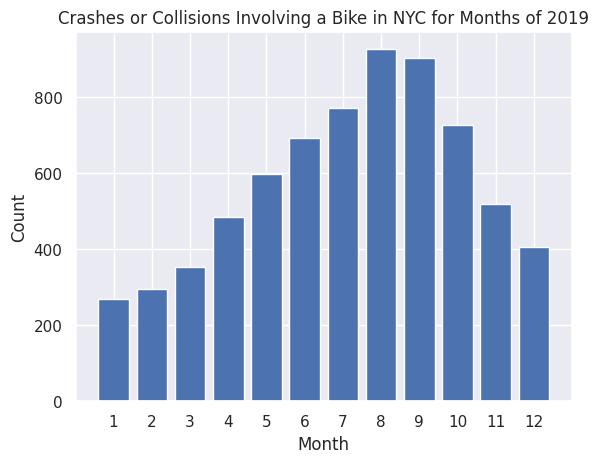

In [ ]:
plt.bar(vzbcmc.index,vzbcmc.values)
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Crashes or Collisions Involving a Bike in NYC for Months of 2019')
plt.show()
#2020 april...why? rain or covid

In [ ]:
#print img vzbcmc : vision zero bike (colisions or crashes) monthly count
vzbctc = vzbr2019['TIME'].str.split(':').str[0].astype('int').value_counts().sort_index()

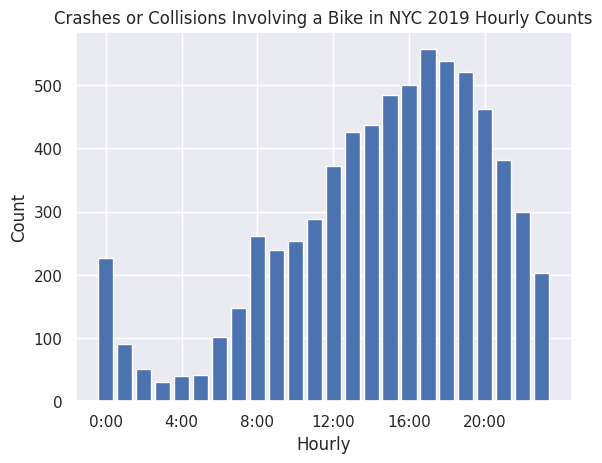

In [ ]:
plt.bar(vzbctc.index,vzbctc.values)
plt.xticks(range(0,24,4),[str(x)+":00" for x in range(0,24,4)])
plt.xlabel('Hourly')
plt.ylabel('Count')
plt.title('Crashes or Collisions Involving a Bike in NYC 2019 Hourly Counts')
plt.show()

<Axes: xlabel='Month Year'>

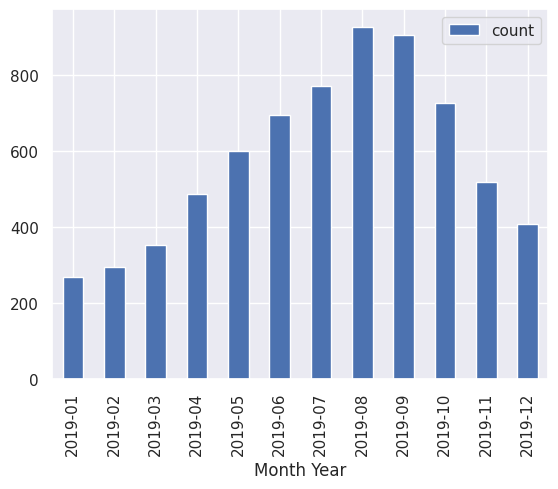

In [ ]:
# create a representation of the month with strfmt
vzbr2019['Month Year'] = vzbr2019['DATE'].map(lambda dt: dt.strftime('%Y-%m'))
grouped_vzbr2019 = vzbr2019.groupby('Month Year').size().to_frame("count").reset_index()
grouped_vzbr2019.plot(kind='bar', x='Month Year', y='count')
#sns.lmplot(data=vzbr2019, x='Collision ID', y='Crash Time', col='PERSON_INJURY', hue='GENDER')

In [ ]:
print(vzbr2019['BODILY_INJURY'].unique())

['Knee-Lower Leg Foot' 'Back' 'Elbow-Lower-Arm-Hand' 'Hip-Upper Leg'
 'Neck' 'Does Not Apply' 'Shoulder - Upper Arm' 'Entire Body' 'Head'
 'Face' 'Chest' 'Unknown' 'Eye' 'Abdomen - Pelvis']


In [ ]:
print('Bodily Injury: \n', vzbr2019['BODILY_INJURY'].value_counts())

Bodily Injury: 
 Does Not Apply          1948
Knee-Lower Leg Foot     1533
Elbow-Lower-Arm-Hand     709
Head                     678
Shoulder - Upper Arm     520
Back                     337
Entire Body              315
Hip-Upper Leg            293
Face                     254
Neck                     158
Chest                     84
Abdomen - Pelvis          72
Unknown                   48
Eye                        3
Name: BODILY_INJURY, dtype: int64


In [ ]:
print(vzbr2019['GENDER'].value_counts())

M    6004
F     935
U      13
Name: GENDER, dtype: int64


<Axes: title={'center': '2019 Bicyclist Bodily Injuries due to Collision or Crash'}, ylabel='BODILY_INJURY'>

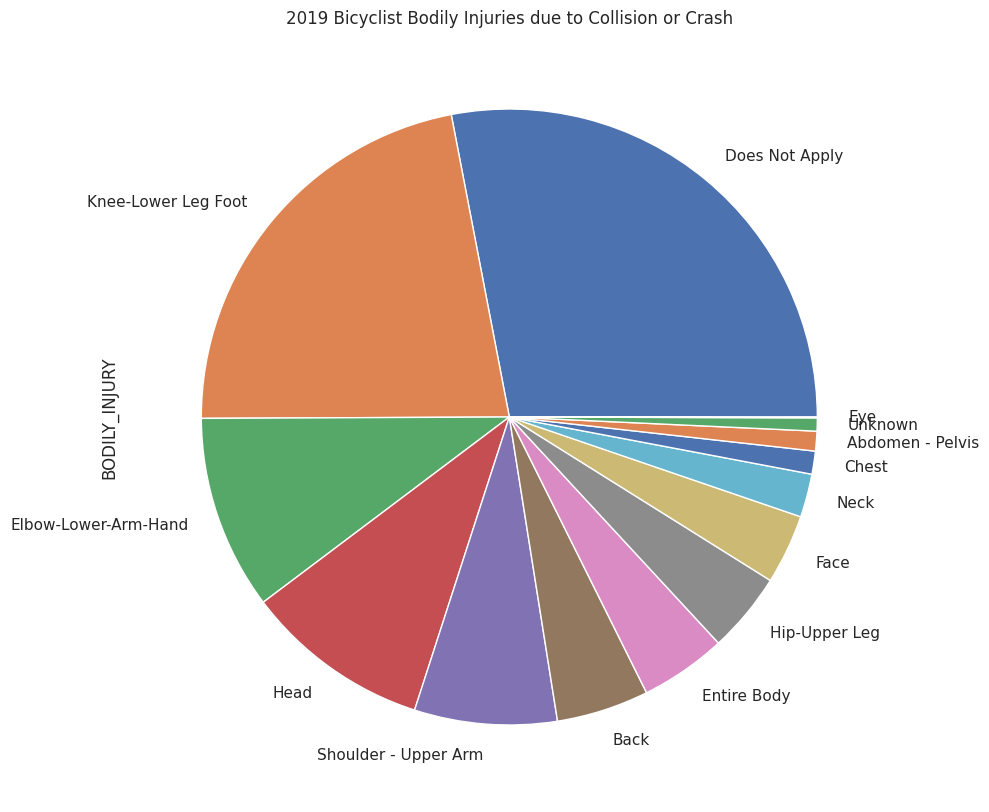

In [ ]:
vzbr2019['BODILY_INJURY'].value_counts().plot.pie(figsize=(14,10), title='2019 Bicyclist Bodily Injuries due to Collision or Crash')

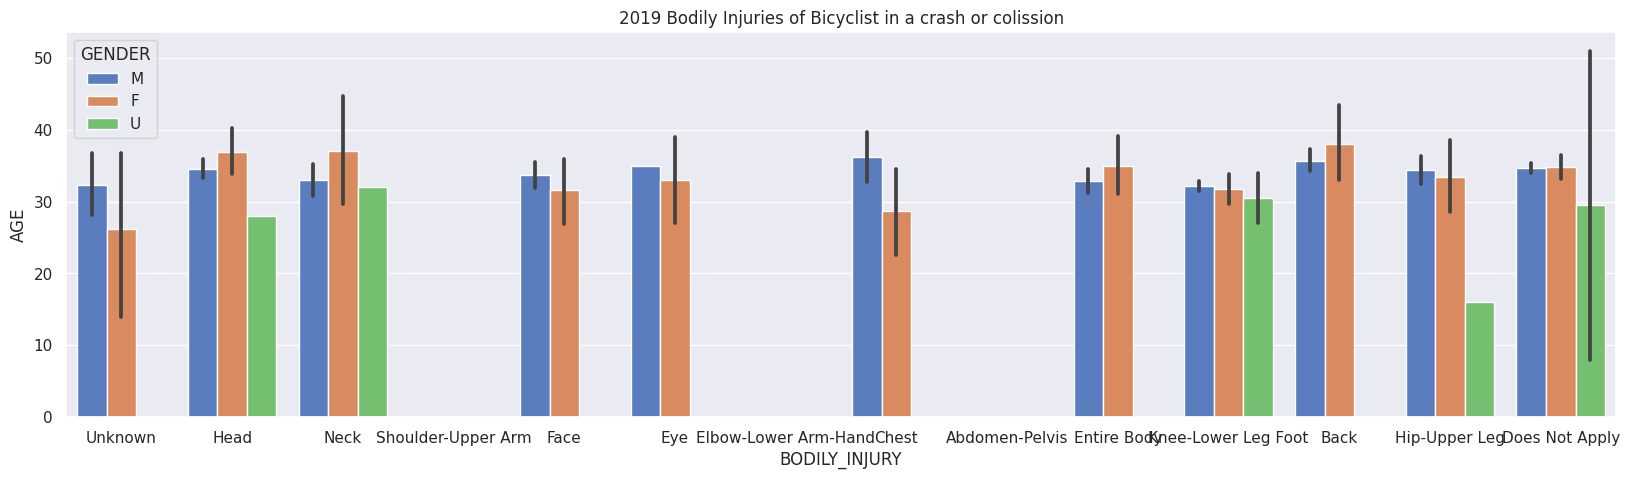

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=vzbr2019, x='BODILY_INJURY', y='AGE', hue='GENDER', order = ['Unknown', 'Head', 'Neck', 'Shoulder-Upper Arm', 'Face', 'Eye', 'Elbow-Lower Arm-Hand', 'Chest', 'Abdomen-Pelvis', 'Entire Body', 'Knee-Lower Leg Foot', 'Back', 'Hip-Upper Leg', 'Does Not Apply'], palette = "muted" )
plt.title("2019 Bodily Injuries of Bicyclist in a crash or colission")
plt.show()

In [ ]:
print('Emotional Status: \n', vzbr2019['EMOTIONAL_STATUS'].value_counts())

Emotional Status: 
 Conscious         4702
Does Not Apply    1949
Shock               95
Unknown             79
Semiconscious       49
Unconscious         33
Incoherent          26
Apparent Death      19
Name: EMOTIONAL_STATUS, dtype: int64


<Axes: title={'center': '2019 Bicyclist Emotional Status at Time of Collision or Crash'}, ylabel='EMOTIONAL_STATUS'>

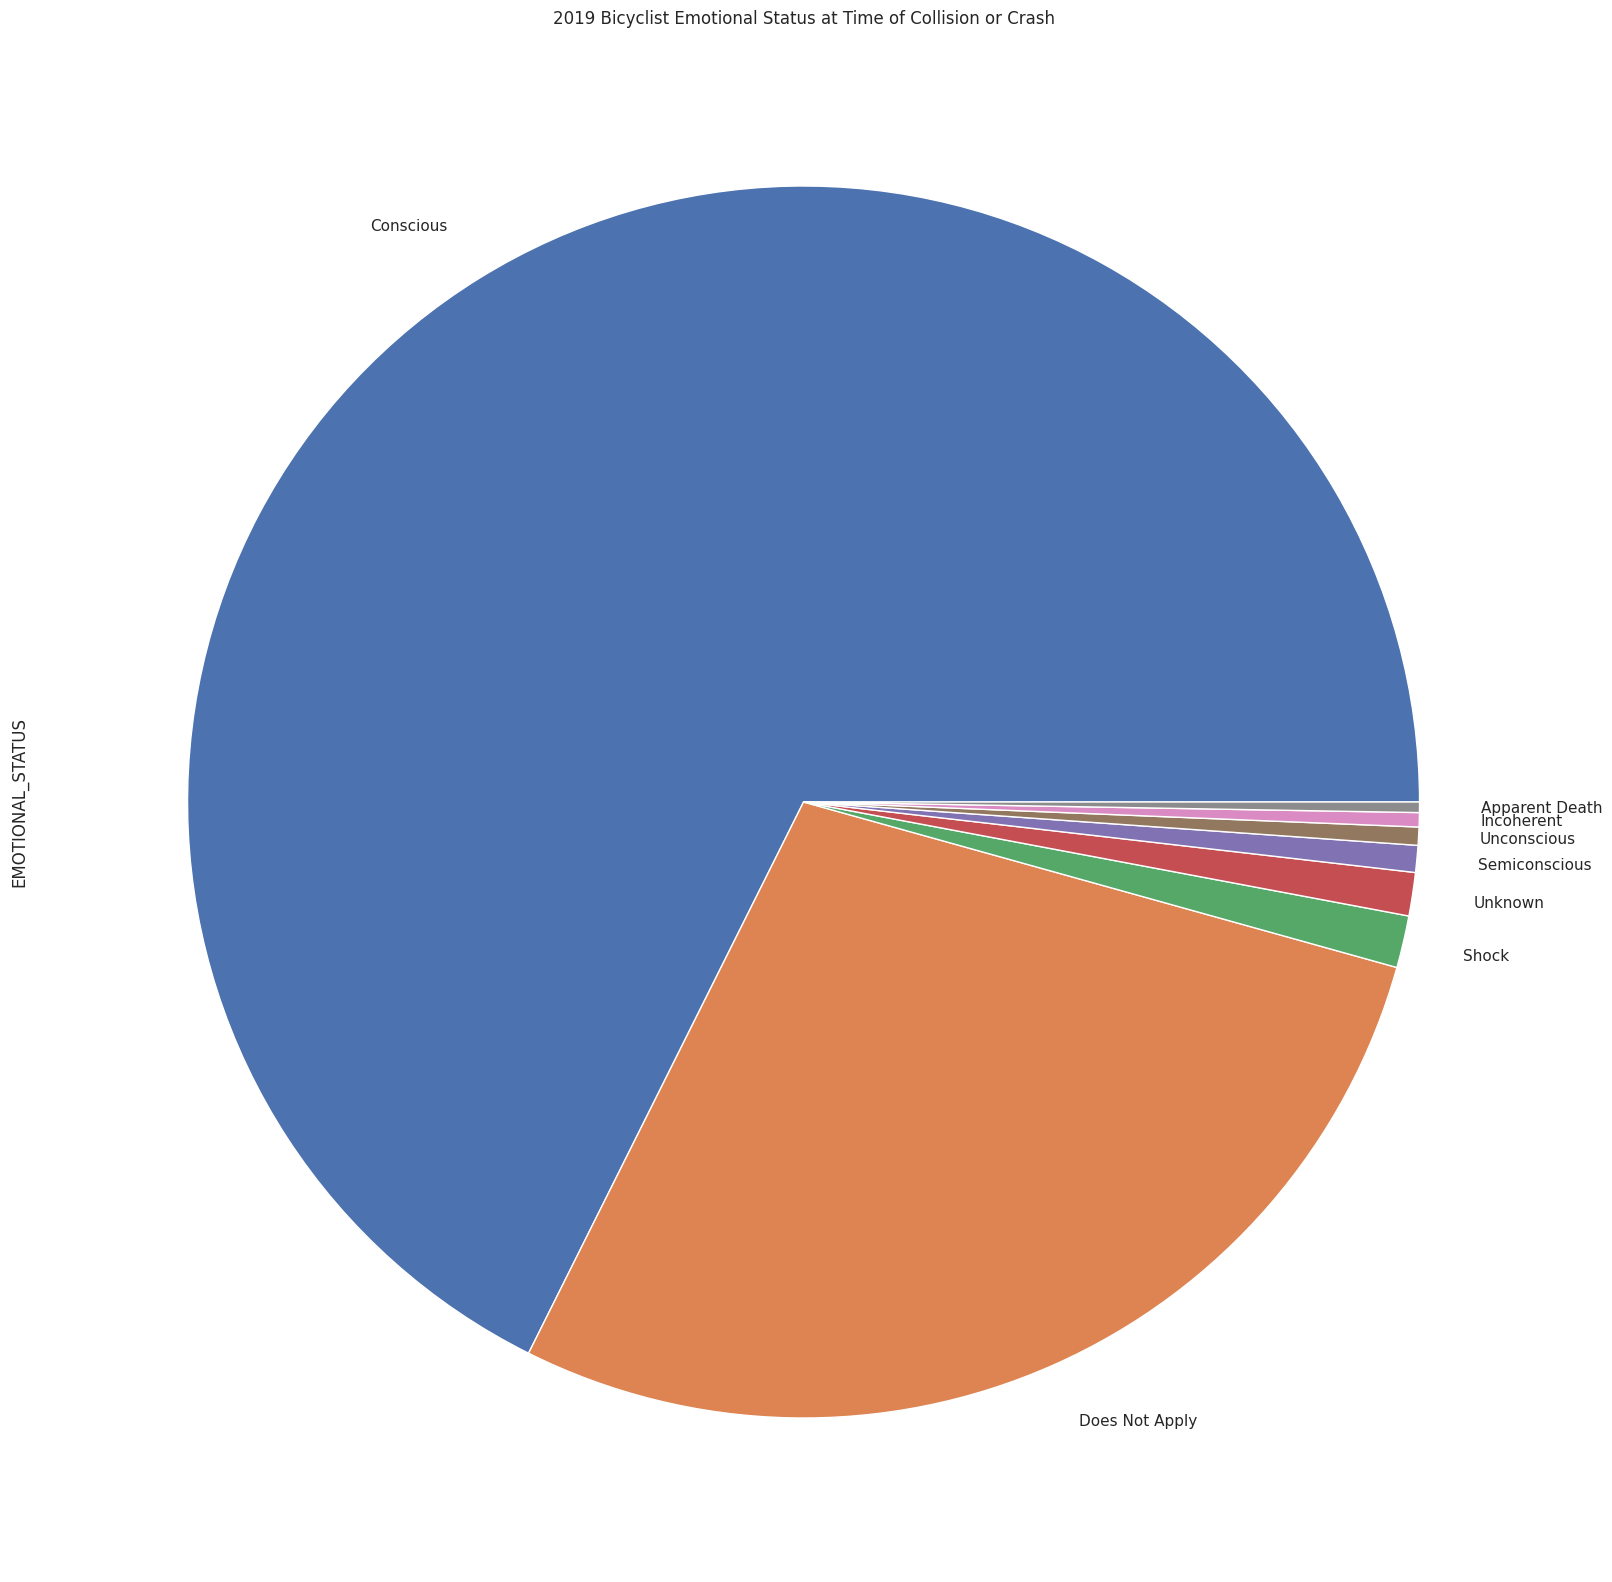

In [ ]:
vzbr2019['EMOTIONAL_STATUS'].value_counts().plot.pie(figsize=(20,20), title='2019 Bicyclist Emotional Status at Time of Collision or Crash')

/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


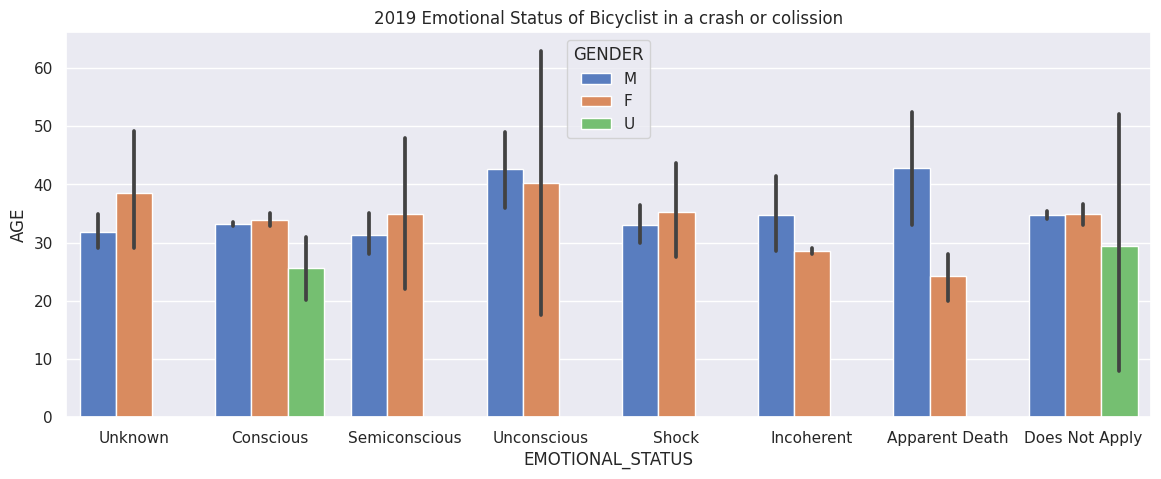

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=vzbr2019, x='EMOTIONAL_STATUS', y='AGE', hue='GENDER', order = ['Unknown','Conscious', 'Semiconscious', 'Unconscious', 'Shock', 'Incoherent', 'Apparent Death', 'Does Not Apply'], palette = "muted" )
plt.title("2019 Emotional Status of Bicyclist in a crash or colission")
plt.show()
#Unknown seem to be soley conciou

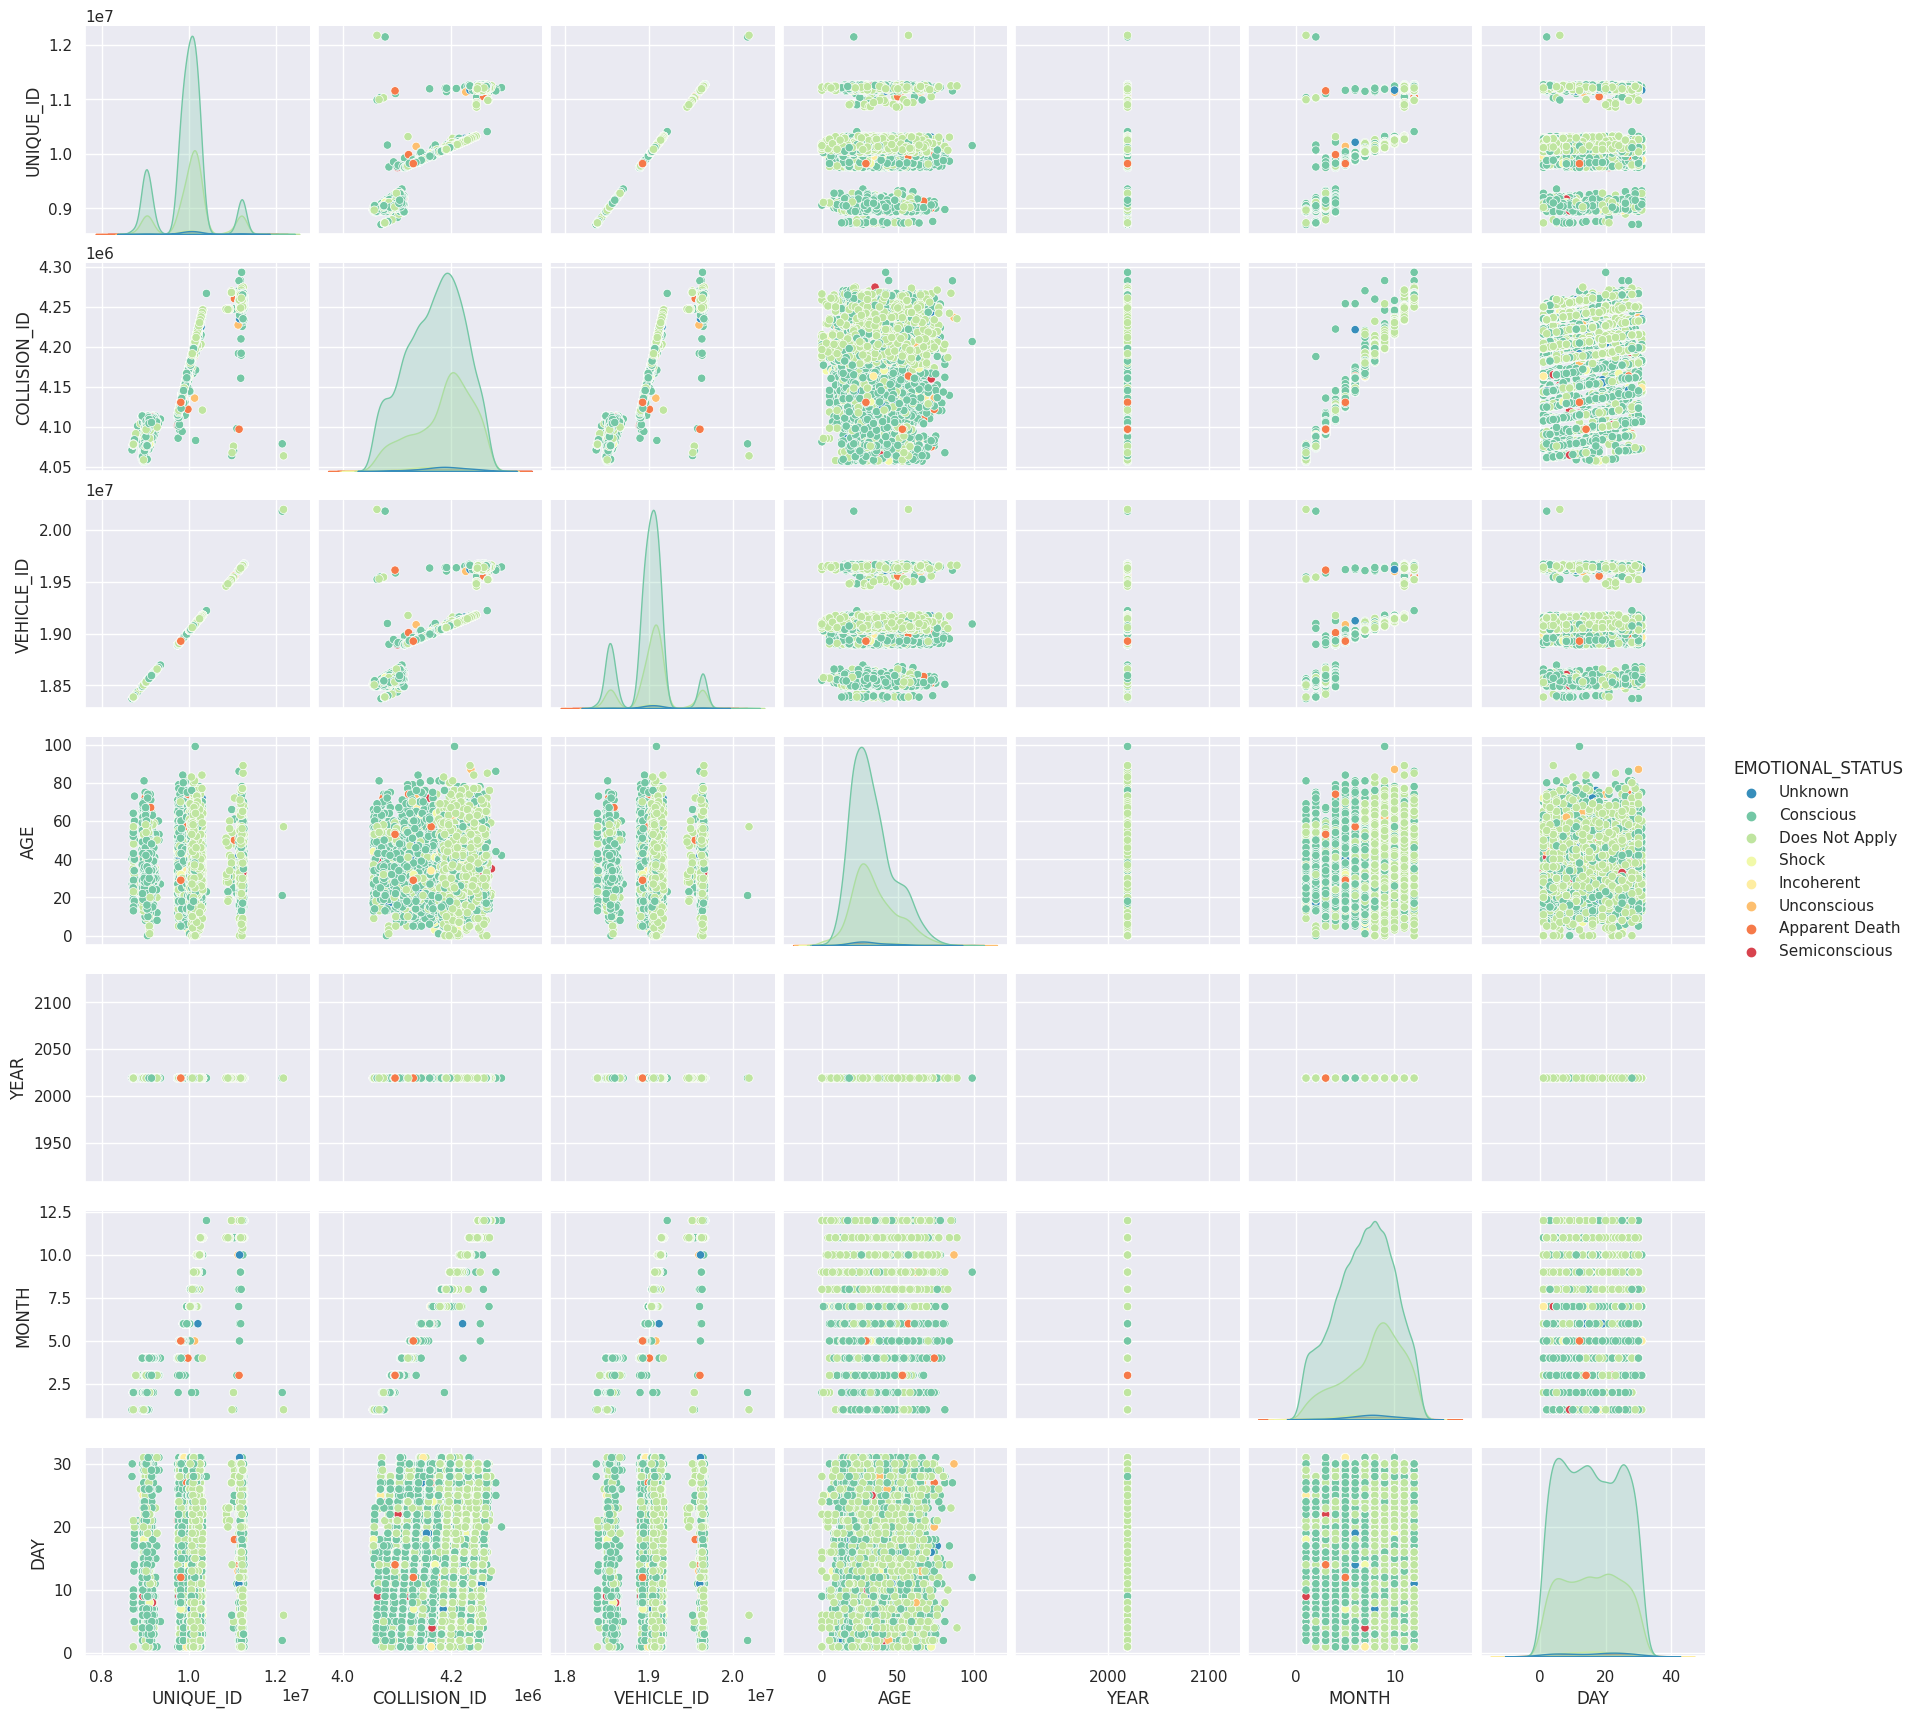

In [ ]:
sns.pairplot(data=vzbr2019, hue='EMOTIONAL_STATUS',  palette='Spectral_r') 

In [ ]:
print('Person Injury: \n', vzbr2019['PERSON_INJURY'].value_counts())

Person Injury: 
 Injured        4976
Unspecified    1946
Killed           30
Name: PERSON_INJURY, dtype: int64


In [ ]:
vzbr2019['PERSON_INJURY'].value_counts().sum()

6952

<Axes: title={'center': '2019 Bicyclist Status due to Collision or Crash'}, ylabel='PERSON_INJURY'>

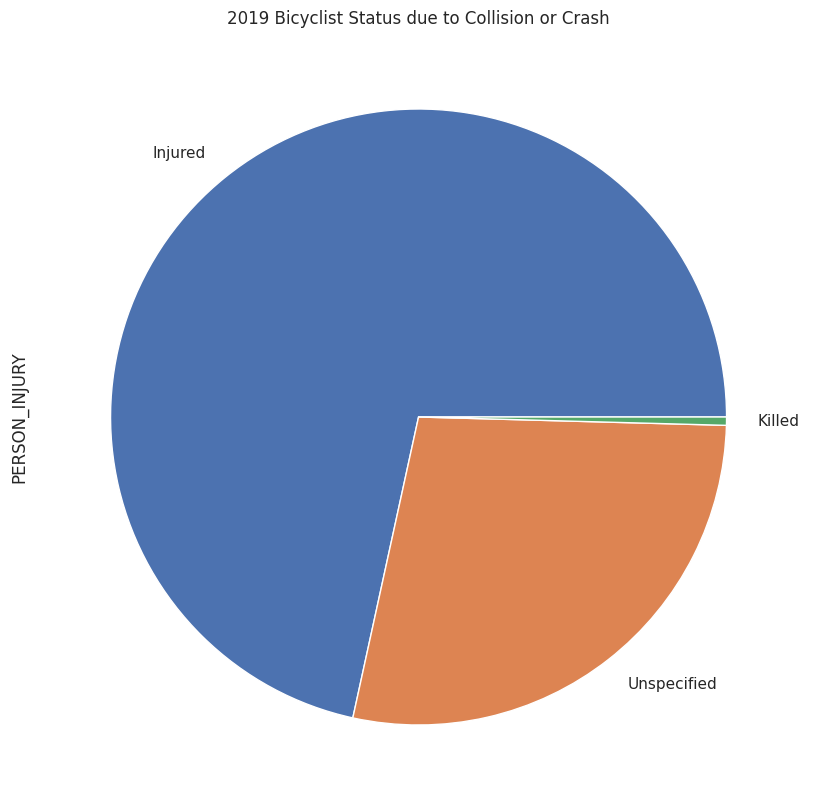

In [ ]:
vzbr2019['PERSON_INJURY'].value_counts().plot.pie(figsize=(14,10), title='2019 Bicyclist Status due to Collision or Crash')

/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


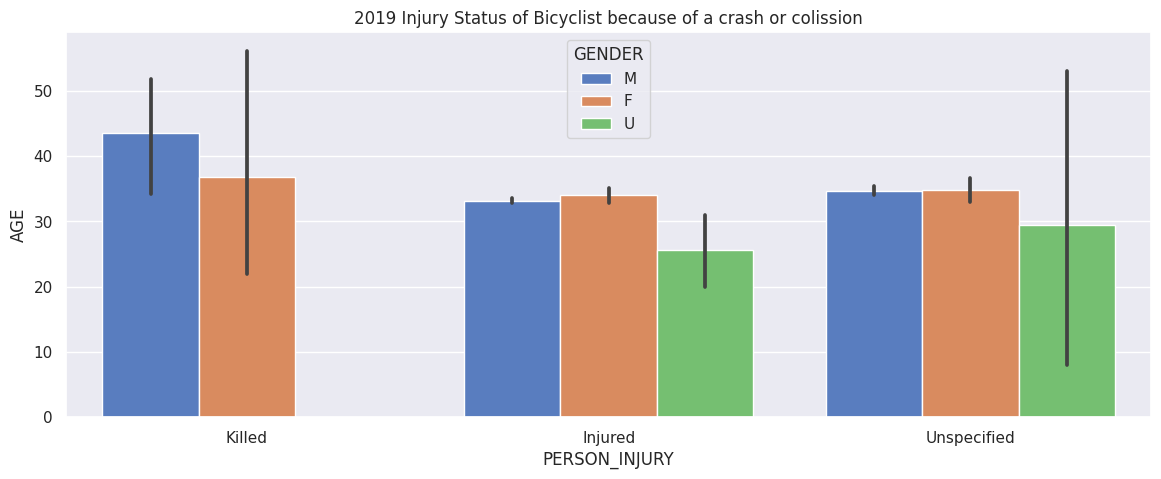

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=vzbr2019, x='PERSON_INJURY', y='AGE', hue='GENDER', order = ['Killed', 'Injured', 'Unspecified'], palette = "muted" )
plt.title("2019 Injury Status of Bicyclist because of a crash or colission")
plt.show()
#U

column compaired to self histogram when its not it is in indescrete form.//// cant use descrete values need to have continuouse data types...
a good way to see if data is workable also. 

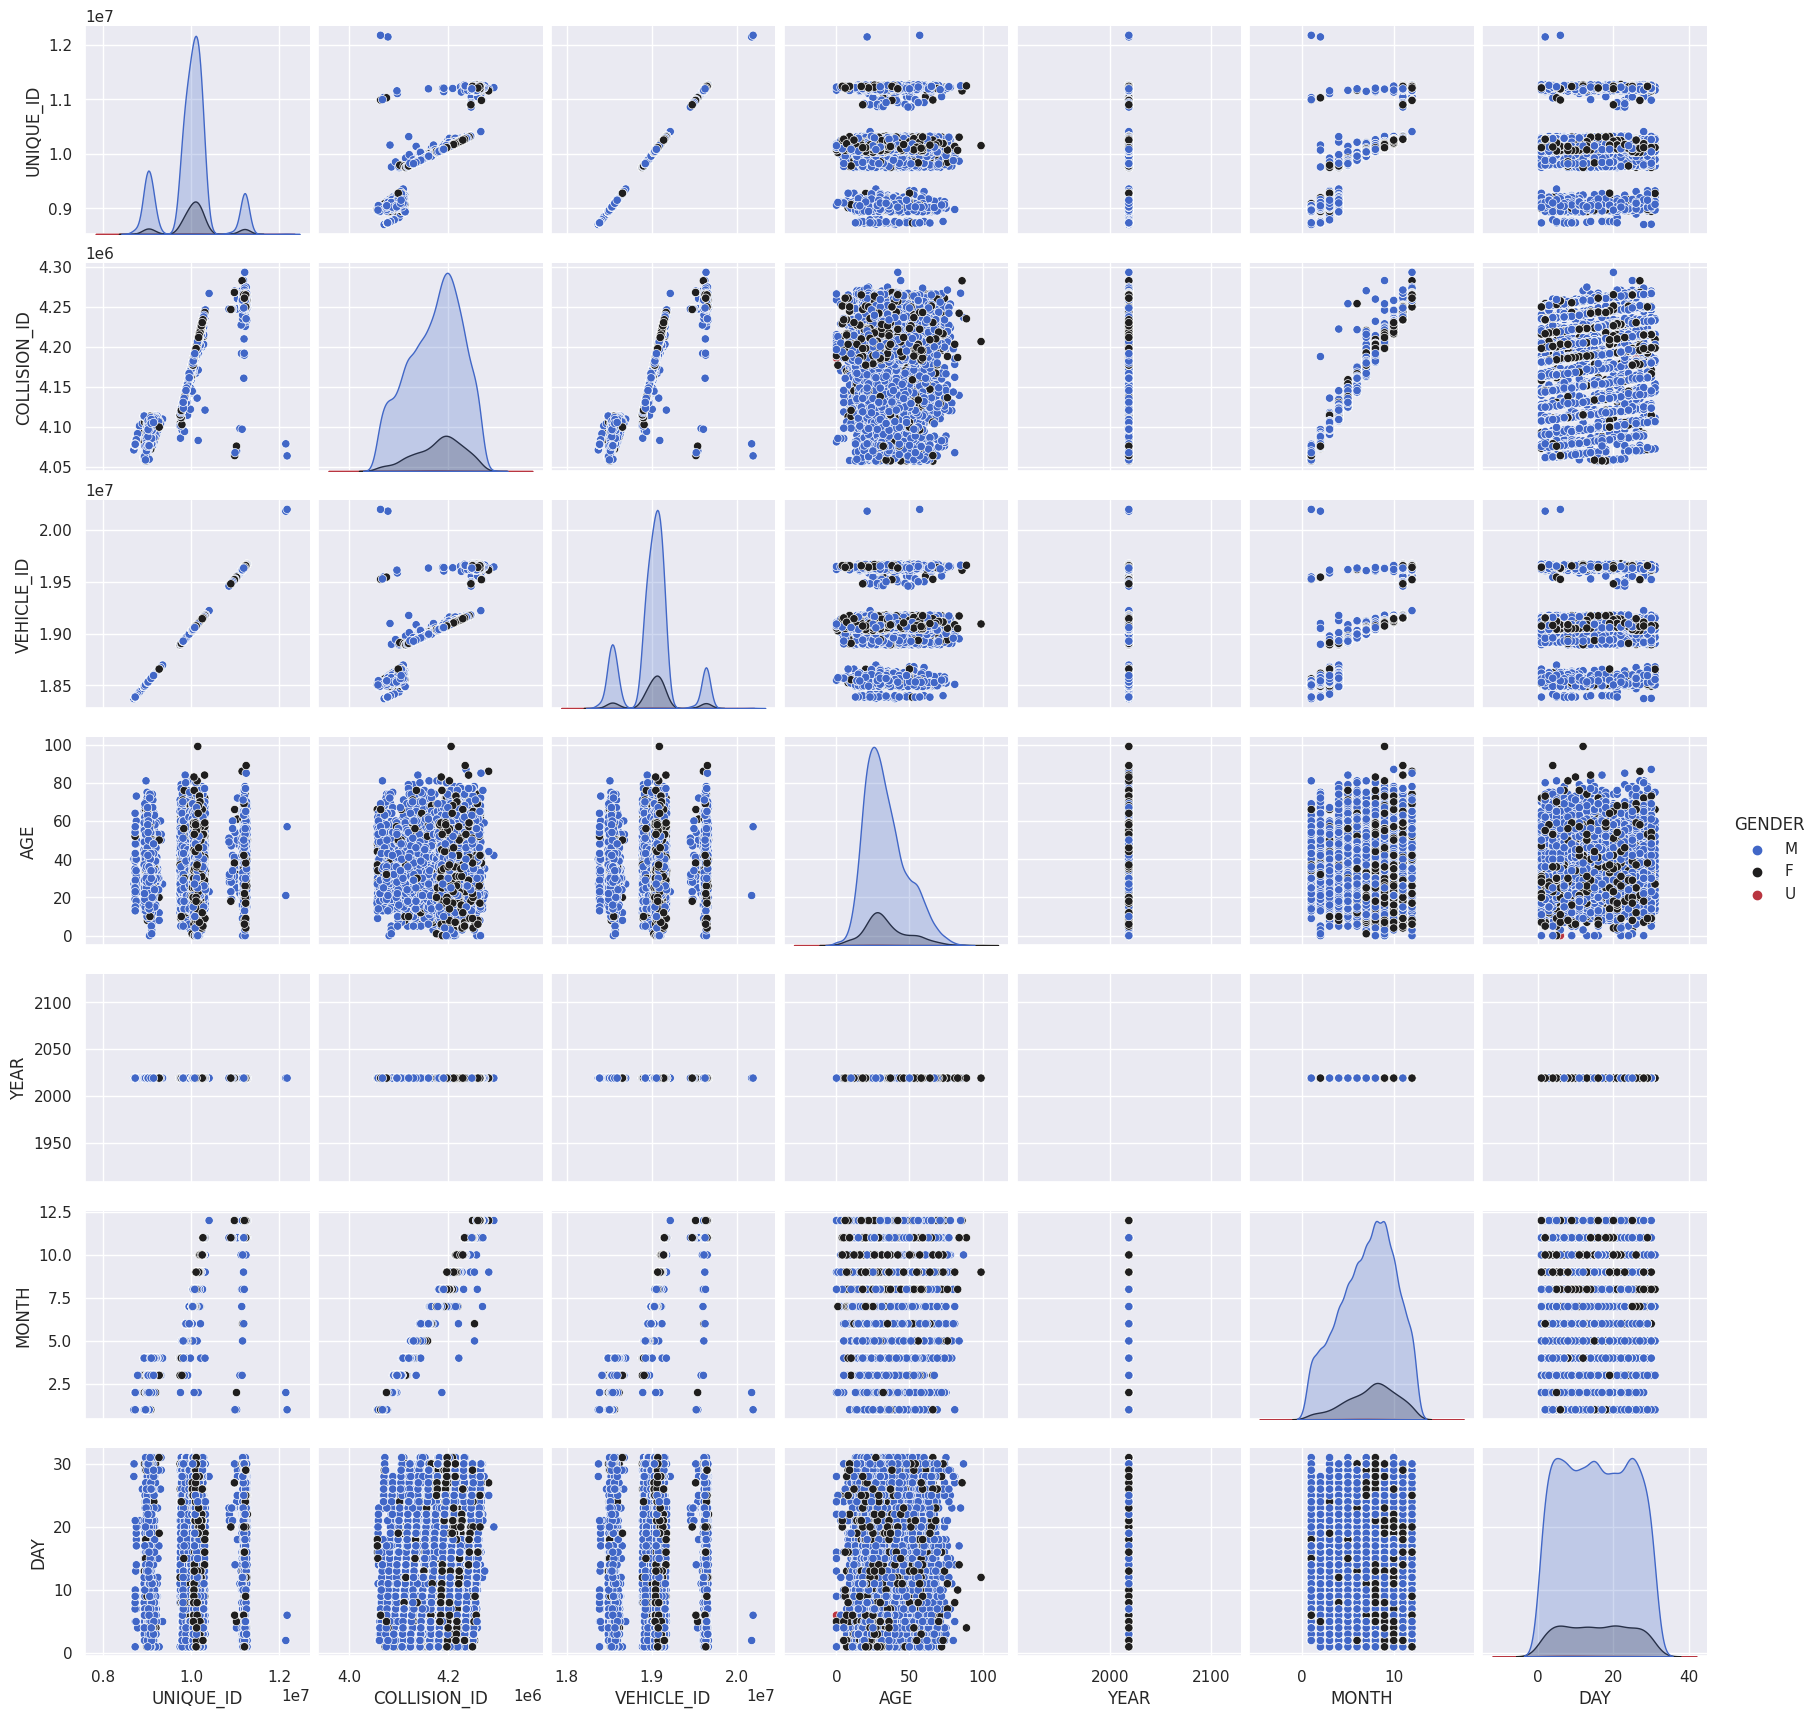

In [ ]:
sns.pairplot(data=vzbr2019, hue='GENDER',  palette='icefire') 

In [ ]:
vzbr2019.groupby(['GENDER','PERSON_INJURY'])['AGE'].mean().sort_values(ascending=True)

GENDER  PERSON_INJURY
U       Injured          25.666667
        Unspecified      29.500000
M       Injured          33.199174
F       Injured          34.019802
M       Unspecified      34.727385
F       Unspecified      34.783699
        Killed           36.833333
M       Killed           43.583333
Name: AGE, dtype: float64

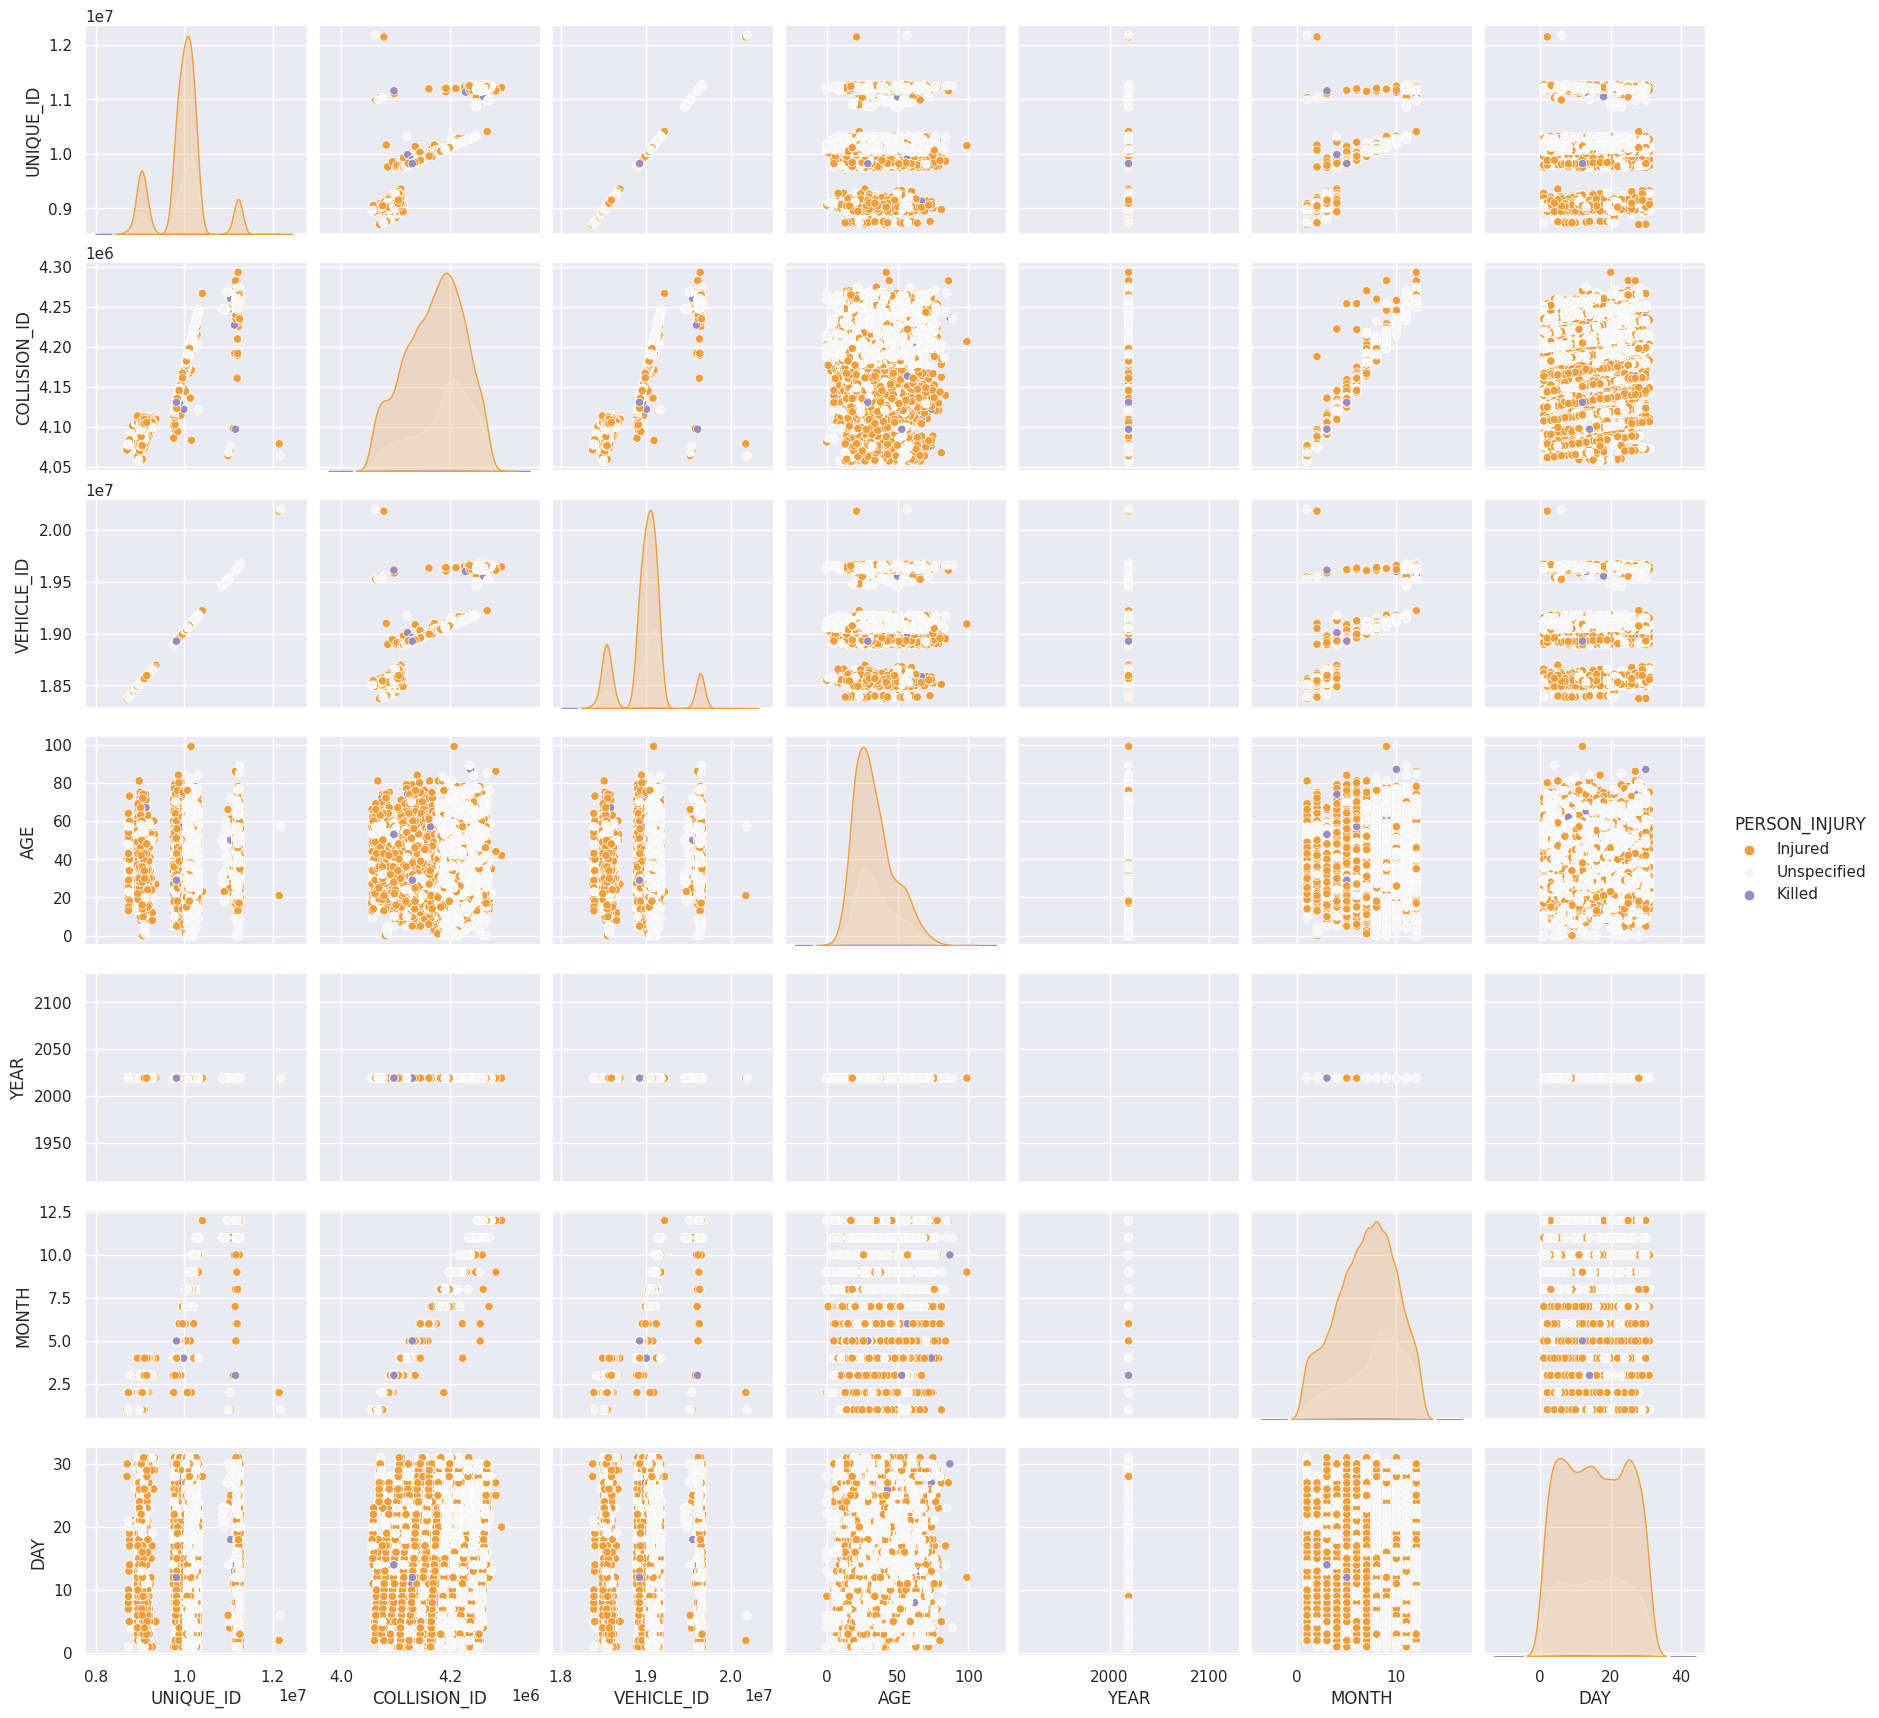

In [ ]:
sns.pairplot(data=vzbr2019, hue='PERSON_INJURY',  palette='PuOr') 

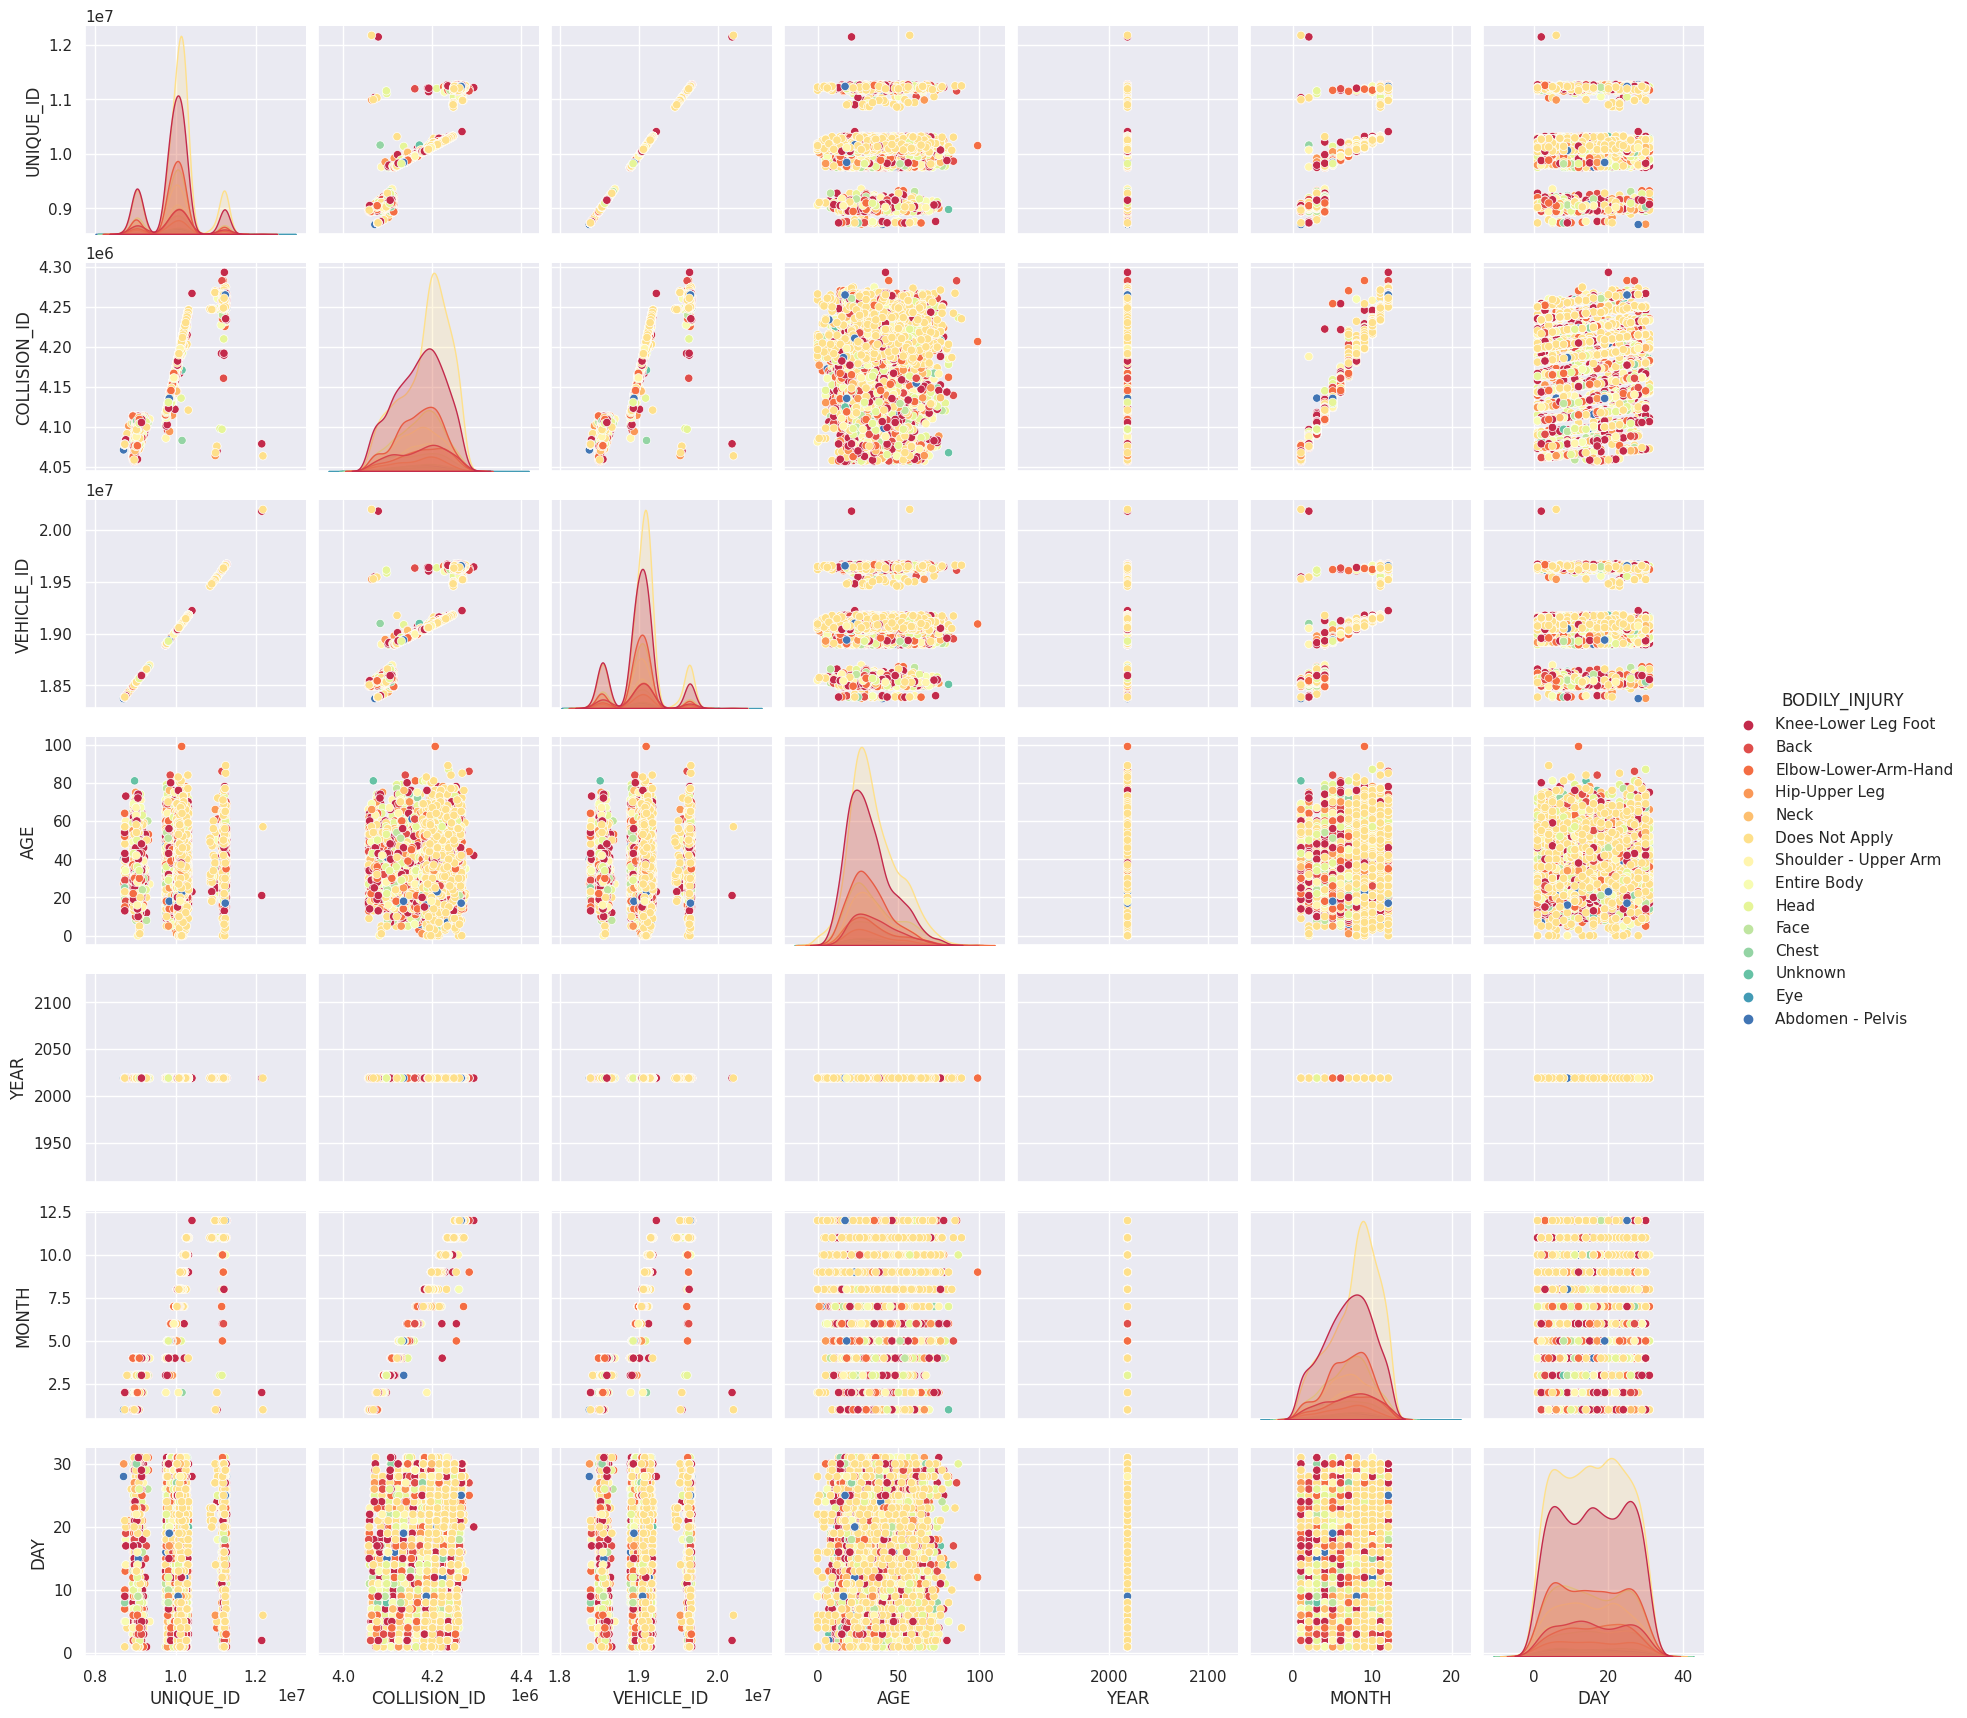

In [ ]:
sns.pairplot(data=vzbr2019, hue='BODILY_INJURY',  palette='Spectral') 

In [ ]:
sns.pairplot(data=vzbr2019, hue='PERSON_TYPE',  palette='Spectral') 

In [ ]:
sns.pairplot(data=vzbr2019, hue='EMOTIONAL_STATUS',  palette='Spectral_r') 

#Summary


## **FOR FUTURE CONSIDERATION**

# New Section

In [ ]:
#print('Rows, Columns:', vzvcr.shape)

In [ ]:
#print(vzvcr.info())

TROUBLE WITH IT NOT RECOGINIZINTG SECOND/THIRD DATAFRAME SET

In [ ]:
#for col in df:
  #print(df[col].unique())


In [ ]:
#df3.set_index('encounter_id')

## 1.   Bicycling Injuries





In [ ]:
#vzbi = vzvcr

In [ ]:
bicycling_injuries = vzbi [(vzbi['PERSON_INJURY'] == 'Killed') | (vzbi['PERSON_INJURY'] == 'Unspecified')].index
vzbi.drop(bicycling_injuries , inplace=True)

In [ ]:
print('Rows, Columns:', vzbi.shape)

In [ ]:
print(vzbi.shape)

In [ ]:
sns.pairplot(data=vzbi, hue='EMOTIONAL_STATUS',  palette='Spectral_r') 

##2. Bicycling Deaths

In [ ]:
vzvcr.shape

In [ ]:
#vzbd = vzvcr

In [ ]:
bicycling_injuries = vzbd [(vzbd['PERSON_INJURY'] == 'Injured') | (vzbd['PERSON_INJURY'] == 'Unspecified')].index
vzbd.drop(bicycling_injuries , inplace=True)

In [ ]:
print('Rows, Columns:', vzbd.shape)

In [ ]:
sns.pairplot(data=vzbd, hue='EMOTIONAL_STATUS',  palette='Spectral_r') 

##3. Bicycling Unspecified

In [ ]:
#vzbu = vzvcr

In [ ]:
bicycling_injuries = vzbu [(vzbu['PERSON_INJURY'] == 'Killed') | (vzbu['PERSON_INJURY'] == 'Injured')].index
vzbu.drop(bicycling_injuries , inplace=True)

In [ ]:
print('Rows, Columns:', vzbu.shape)